# Pymaceuticals Inc.
---

### Analysis

- Capomulin seems to be effective. Though it is not as effective as Ramicane, it is close enough to market it.
- Capomulin and Ramicane seem to be the only two which are effective.
  - Does this behavior hold beyond the first 45 days? Will the tumor size be reduced to zero, or will it eventually stabilize?
- Capomulin performance seems to have had its fits and spurts, at least on mouse l509. Is this intended?
  - There seems to be only two tumor volume drops during l509's time. What happened during those two 5-day stretches, to interrupt the otherwise steady growth of the tumor?
  - On further analysis, it does seem like this is a feature. Or, rather, it seems to be part of the normal behavior pattern of Capomulin.

As an aside, there's a better choice that mouse l509 to use, if we wanted to market Capomulin. There's a few mice whose final tumor size is less than 30mm3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = study_results.merge(mouse_metadata, how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.loc[df.duplicated(["Mouse ID", "Timepoint"], keep=False),:]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
df.loc[df.duplicated(["Mouse ID", "Timepoint"], keep=False),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# This instruction is confusing. The next cell implies that we should drop all data associated with the mouse
# but a cursory thought process shows that if there's two sets of data for a mouse, only one set is a "duplicate"
# I'm not entirely sure what the intended solution here is, but I'm going to assume it's to drop all data
df_clean = df.loc[df["Mouse ID"] != "g989",:]
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

# Note: This *shouldn't* be 248 - we removed a duplicate, so by definition the number of unique mice hasn't changed - one wasn't unique.
df_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"]
regimen_stats = pd.DataFrame.from_dict({
    "Mean Tumor Volume": grouped.mean(),
    "Median Tumor Volume": grouped.median(),
    "Tumor Volume Variance": grouped.var(),
    "Tumor Volume Std. Dev.": grouped.std(),
    "Tumor Volume Std. Err.": grouped.sem()
})
regimen_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"], )

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

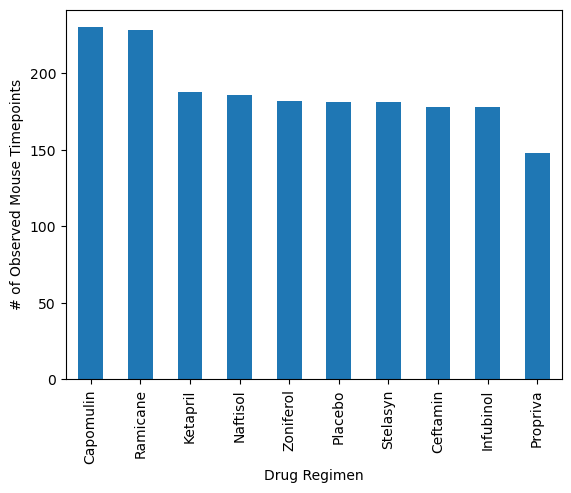

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar = df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].count().sort_values(ascending=False).plot.bar()
bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

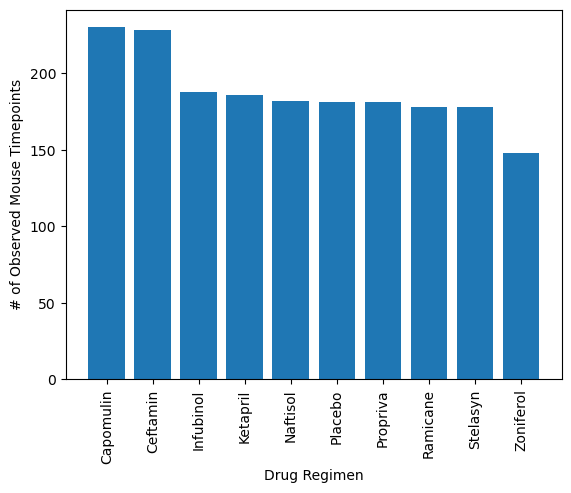

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(grouped.indices.keys(), grouped.count().sort_values(ascending=False))
plt.xticks(range(len(grouped.indices.keys())), grouped.indices.keys(), rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

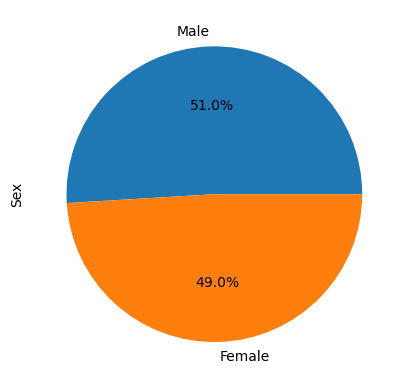

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_clean["Sex"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

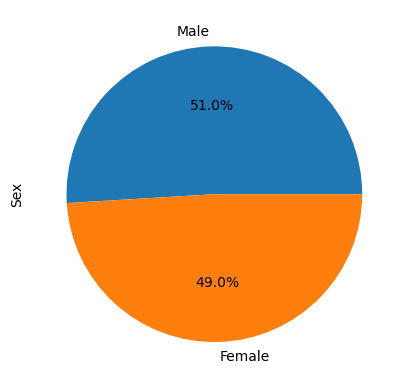

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_clean["Sex"].value_counts().sort_index(ascending=False), labels=sorted(df_clean["Sex"].unique(),reverse=True), autopct="%.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoints = pd.DataFrame(df_clean.groupby("Mouse ID")["Timepoint"].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoints_data = timepoints.merge(df_clean, how="left")

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = timepoints_data.loc[timepoints_data["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - iqr * 1.5
    upper_bound = upperq + iqr * 1.5
    print(f"{treatment}'s potential outliers: {subset.loc[(subset > upper_bound) | (subset < lower_bound)]}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


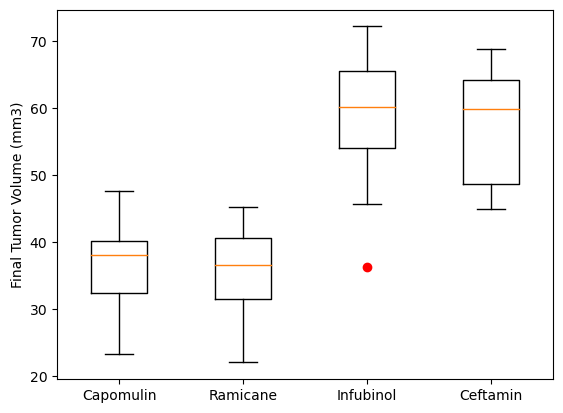

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, sym="ro")
plt.xticks(range(1, len(treatments) + 1), treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [16]:
df_clean.loc[df_clean["Mouse ID"] == "l509",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


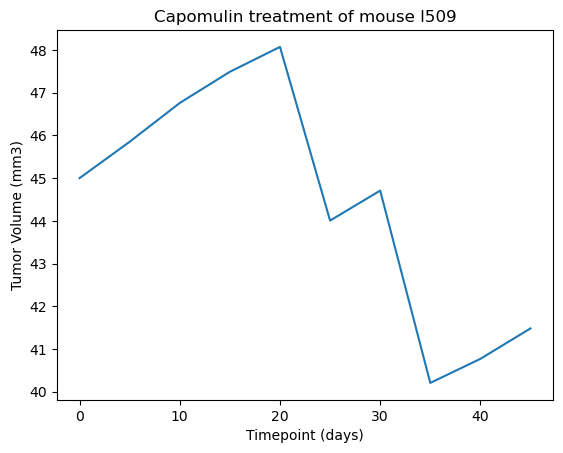

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df = df_clean.loc[df_clean["Mouse ID"] == "l509",:]
plt.plot(l509_df["Timepoint"], l509_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

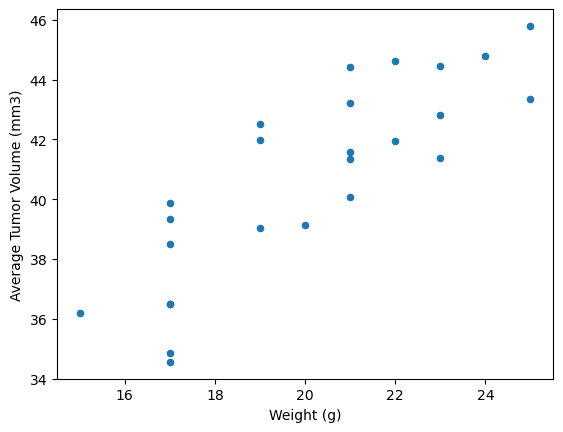

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID").mean(numeric_only=True).plot.scatter("Weight (g)", "Tumor Volume (mm3)")
scatter.set_ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


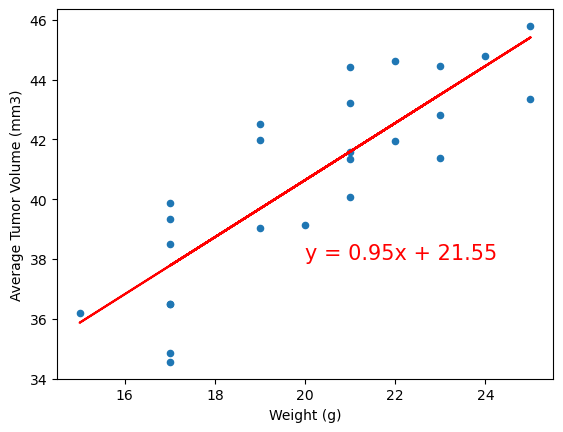

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mean_points = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:].groupby("Mouse ID").mean(numeric_only=True)
scatter = mean_points.plot.scatter("Weight (g)", "Tumor Volume (mm3)")
scatter.set_ylabel("Average Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mean_points["Weight (g)"], mean_points["Tumor Volume (mm3)"])
regress_values = mean_points["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(mean_points["Weight (g)"],regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")

print(f"The correlation between mouse weight and the average tumor volume is {mean_points[['Weight (g)', 'Tumor Volume (mm3)']].corr('pearson').iloc[0,1]:.2f}")

plt.show()

# Extra Plot for Analysis

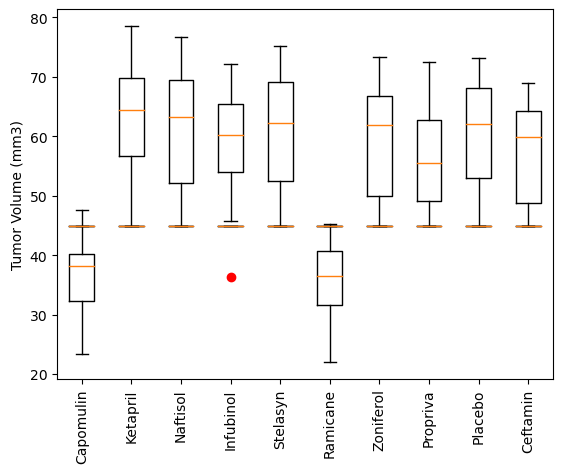

In [28]:
# Start by getting the last (greatest) timepoint for each mouse
timepoints_min = pd.DataFrame(df_clean.groupby("Mouse ID")["Timepoint"].min()).reset_index()
timepoints_max = pd.DataFrame(df_clean.groupby("Mouse ID")["Timepoint"].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoints_data_min = timepoints_min.merge(df_clean, how="left")
timepoints_data_max = timepoints_max.merge(df_clean, how="left")

# Put treatments into a list for for loop (and later for plot labels)
treatments = df_clean["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_min = []
tumor_vol_data_max = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset_min = timepoints_data_min.loc[timepoints_data_min["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    subset_max = timepoints_data_max.loc[timepoints_data_max["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data_min.append(subset_min)
    tumor_vol_data_max.append(subset_max)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data_min, sym="ro")
plt.boxplot(tumor_vol_data_max, sym="ro")
plt.xticks(range(1, len(treatments) + 1), treatments, rotation=90)
plt.ylabel("Tumor Volume (mm3)")
plt.show()

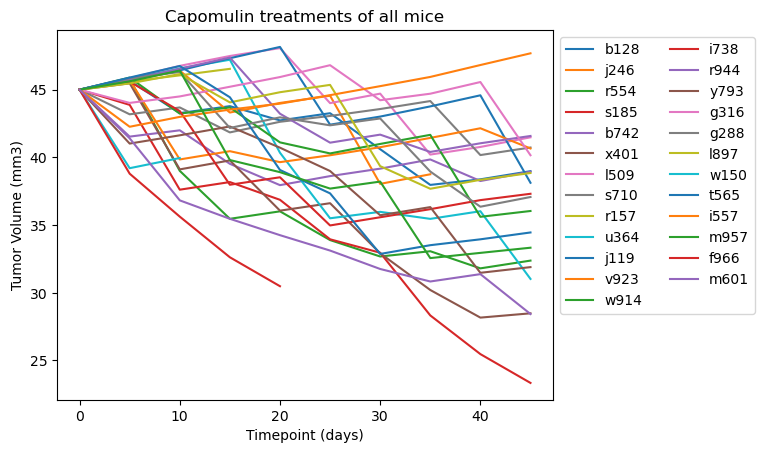

In [38]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = df_clean.loc[df_clean["Drug Regimen"] == "Capomulin",:]

for mouse in capomulin_df["Mouse ID"].unique():
    mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse,:]
    plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])
# i thought adding a legend might make this make a little more sense. NOPE! it looks good, though, so i guess i'll leave it
plt.legend(capomulin_df["Mouse ID"].unique(), ncols=2, loc="upper left", bbox_to_anchor=(1.0,1.0))
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatments of all mice")
plt.show()